# Objective

In this project, we will predict which product will be in a user's next order. The dataset is anonymized and contains a sample of over 3 million grocery orders from more than 200,000 Instacart users.

First, we will import the necessary modules and read the required csv files.

In [70]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [71]:
order_products_training_df = pd.read_csv("order_products__train.csv")
order_products_prior_df = pd.read_csv("order_products__prior.csv")
orders_df = pd.read_csv("orders.csv")
products_df = pd.read_csv("products.csv")
aisles_df = pd.read_csv("aisles.csv")
departments_df = pd.read_csv("departments.csv")

# Data Exploration

Let us explore the data in each of these files, by looking at the first 10 and last 10 rows of data for **each** of the csv files.

In [72]:
order_products_training_df.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [73]:
order_products_training_df.tail(10)

,order_id,product_id,add_to_cart_order,reordered
1384607,3421058,30316,6,1
1384608,3421058,35578,7,0
1384609,3421058,32650,8,1
1384610,3421063,49235,1,1
1384611,3421063,13565,2,1
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1
1384616,3421070,4724,3,1


In [74]:
order_products_prior_df.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [75]:
order_products_prior_df.tail(10)

,order_id,product_id,add_to_cart_order,reordered
32434479,3421083,7854,1,0
32434480,3421083,45309,2,0
32434481,3421083,21162,3,0
32434482,3421083,18176,4,1
32434483,3421083,35211,5,0
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1
32434488,3421083,5020,10,1


In [76]:
orders_df.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [79]:
orders_df.tail(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3421073,2307371,206209,prior,5,4,15,3.0
3421074,3186442,206209,prior,6,0,16,3.0
3421075,550836,206209,prior,7,2,13,9.0
3421076,2129269,206209,prior,8,3,17,22.0
3421077,2558525,206209,prior,9,4,15,22.0
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0
3421082,272231,206209,train,14,6,14,30.0


In [80]:
products_df.head(10)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [81]:
products_df.tail(10)

,product_id,product_name,aisle_id,department_id
49678,49679,Famous Chocolate Wafers,61,19
49679,49680,All Natural Creamy Caesar Dressing,89,13
49680,49681,Spaghetti with Meatballs and Sauce Meal,38,1
49681,49682,California Limeade,98,7
49682,49683,Cucumber Kirby,83,4
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8
49687,49688,Fresh Foaming Cleanser,73,11


In [82]:
aisles_df.head(10)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


In [83]:
aisles_df.tail(10)

,aisle_id,aisle
124,125,trail mix snack mix
125,126,feminine care
126,127,body lotions soap
127,128,tortillas flat bread
128,129,frozen appetizers sides
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief
133,134,specialty wines champagnes


In [84]:
departments_df.head(10)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [85]:
departments_df.tail(10)

,department_id,department
11,12,meat seafood
12,13,pantry
13,14,breakfast
14,15,canned goods
15,16,dairy eggs
16,17,household
17,18,babies
18,19,snacks
19,20,deli
20,21,missing


# Check for missing values

In [86]:
#check percentage of missing values
total = orders_df.isnull().sum().sort_values(ascending=True)
percentage = orders_df.isnull().sum()/orders_df.isnull().count().sort_values(ascending=True)
table = pd.concat([total,percentage],keys=['total','percentage'],axis=1)
table

,total,percentage
order_id,0,0.000000
user_id,0,0.000000
eval_set,0,0.000000
order_number,0,0.000000
order_dow,0,0.000000
order_hour_of_day,0,0.000000
days_since_prior_order,206209,0.060276


As you can see in the table above, only days_since_prior_order has missing values. 6.0276% of days_since_prior_order data is missing in.

In [126]:
number_customers = len(set(orders_df.user_id))
print 'The number of unique customers in the whole dataset is:',number_customers

The number of unique customers in the whole dataset is: 206209


In [88]:
def get_counts(x):
    return len(np.unique(x))

count_srs = orders_df.groupby("eval_set")["user_id"].aggregate(get_counts)
count_srs

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

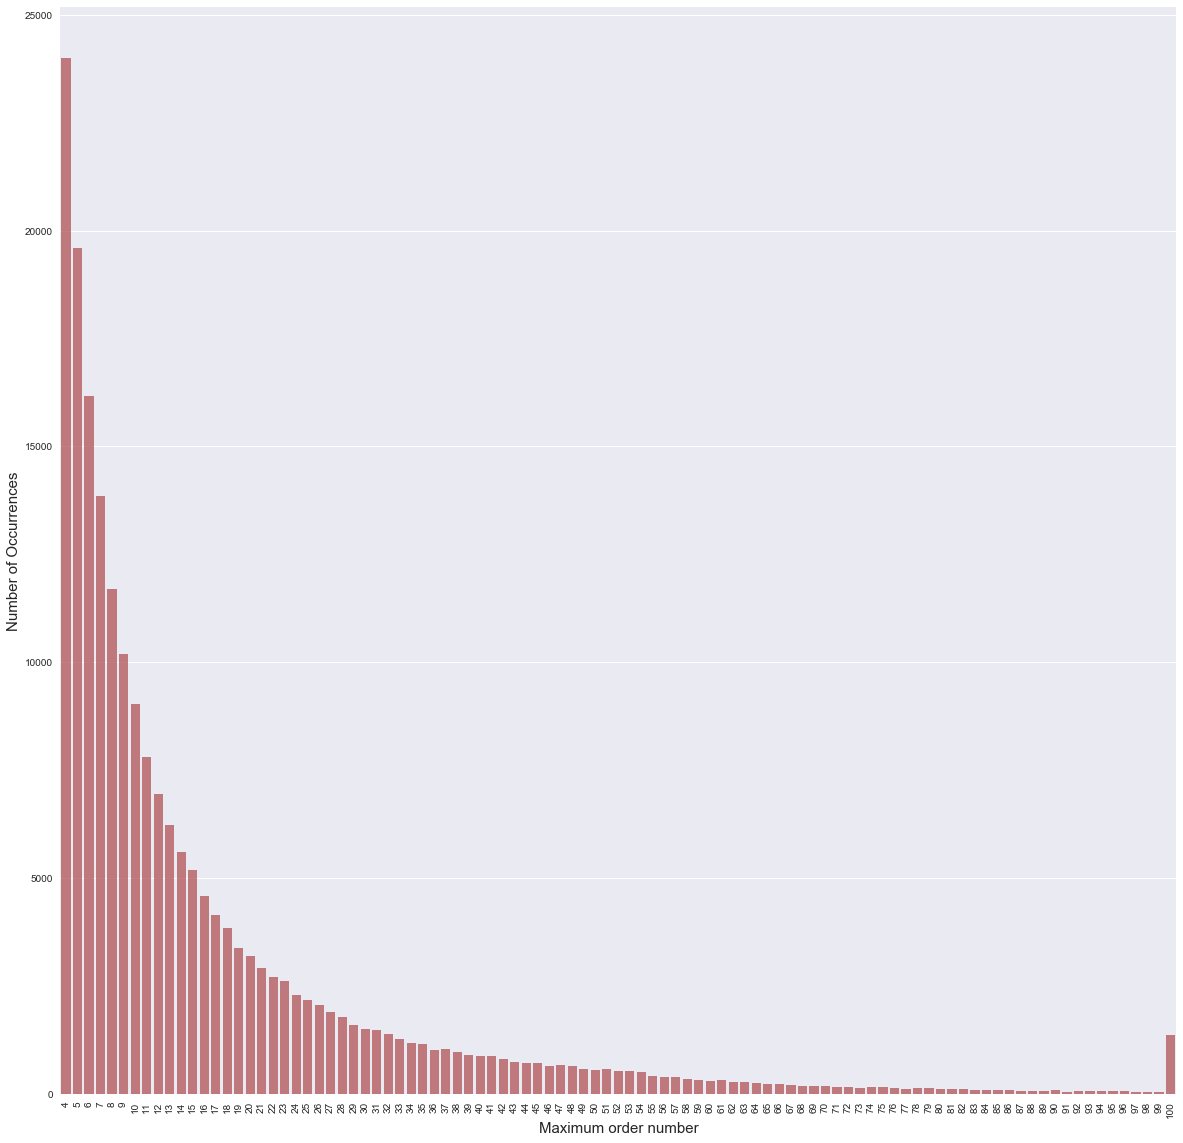

In [89]:
cnt_srs = orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_srs = cnt_srs.order_number.value_counts()

plt.figure(figsize=(20,20))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=15)
plt.xlabel('Maximum order number', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

As you can see in the diagram above, the minimum items ordered is 4 and the maximum is 100.

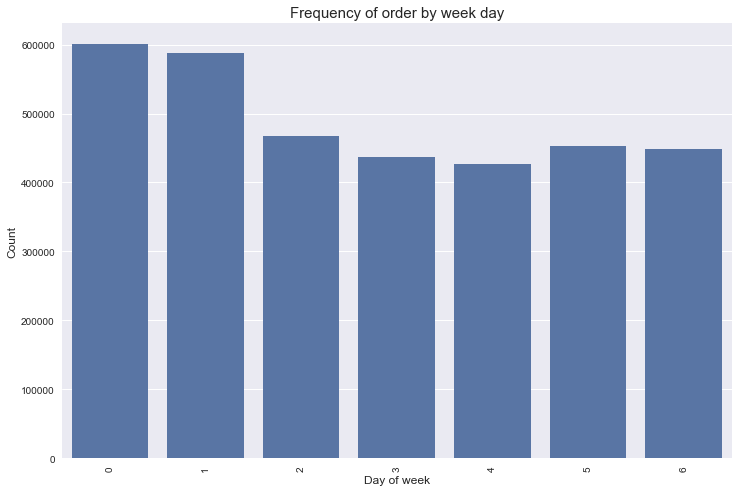

In [90]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=orders_df, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

Let us assume that 0 is Saturday and 1 is Sunday. Then, the number of orders made on Saturdays and Sundays are the highest, with the number of orders being the lowers on Wednesday. 

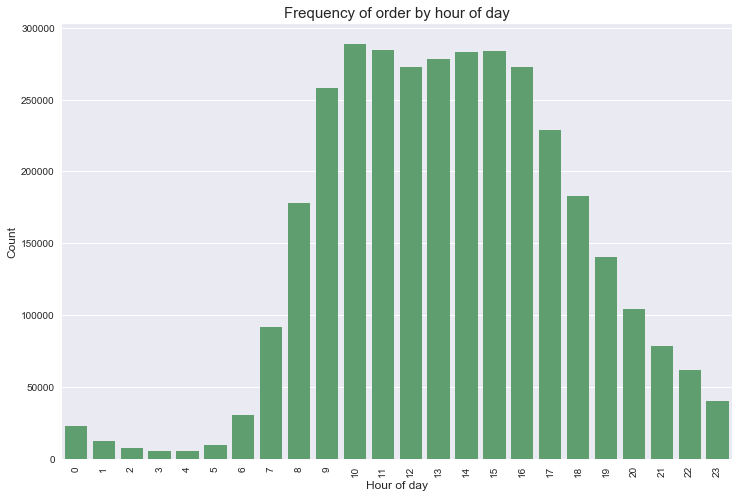

In [91]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders_df, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

As in the diagram, it is evident to us that the largest number of orders are made between 9am and 5pm.

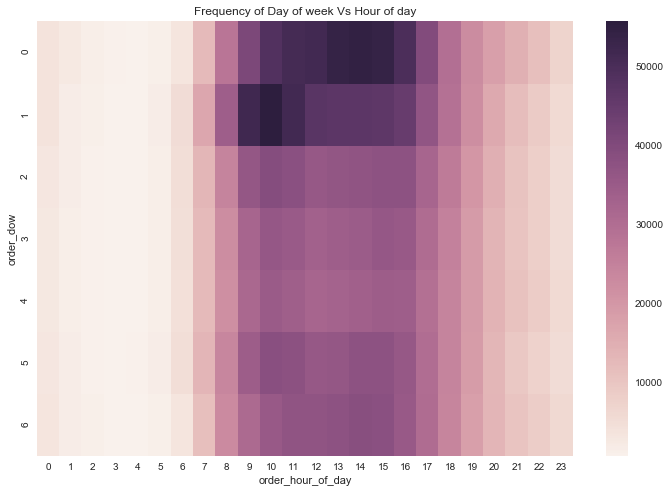

In [92]:
grouped_df = orders_df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,8))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

A high frequency of orders are made between 9am and 5pm everyday, with the highest frequencies being on Saturdays and Sundays between 9am and 5pm. There are very few orders in the early hours of the day after midnight until 7am, and after 8pm. 

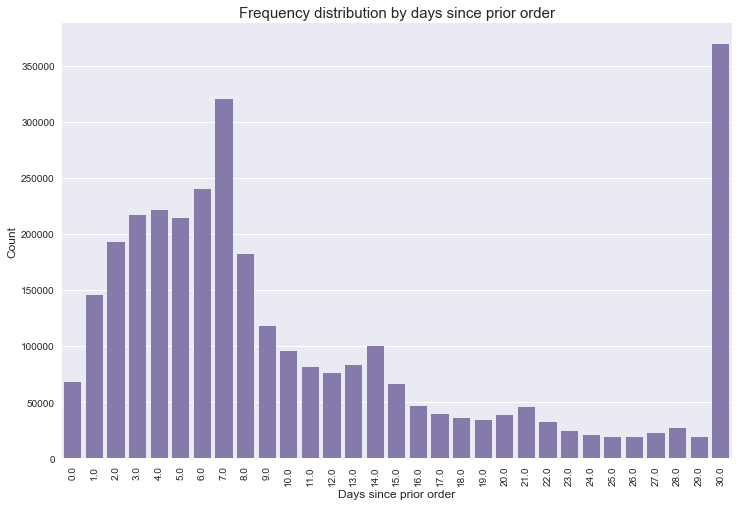

In [93]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders_df, color=color[3])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

This graph shows us that customers mostly order items every 7 days and 30 days as seen in the peeks of the graph. 

In [94]:
grouped = pd.merge(grouped, products_df[['product_id', 'product_name']], how='left', on=['product_id'])
grouped = grouped.sort_values(by='Total_reorders', ascending=False)[:10]
grouped

,product_id,Total_reorders,product_name_x,product_name_y,product_name_x,product_name_y,product_name
0,24852,491291,Banana,Banana,Banana,Banana,Banana
1,13176,394930,Bag of Organic Bananas,Bag of Organic Bananas,Bag of Organic Bananas,Bag of Organic Bananas,Bag of Organic Bananas
2,21137,275577,Organic Strawberries,Organic Strawberries,Organic Strawberries,Organic Strawberries,Organic Strawberries
3,21903,251705,Organic Baby Spinach,Organic Baby Spinach,Organic Baby Spinach,Organic Baby Spinach,Organic Baby Spinach
4,47209,220877,Organic Hass Avocado,Organic Hass Avocado,Organic Hass Avocado,Organic Hass Avocado,Organic Hass Avocado
5,47766,184224,Organic Avocado,Organic Avocado,Organic Avocado,Organic Avocado,Organic Avocado
6,47626,160792,Large Lemon,Large Lemon,Large Lemon,Large Lemon,Large Lemon
7,16797,149445,Strawberries,Strawberries,Strawberries,Strawberries,Strawberries
8,26209,146660,Limes,Limes,Limes,Limes,Limes
9,27845,142813,Organic Whole Milk,Organic Whole Milk,Organic Whole Milk,Organic Whole Milk,Organic Whole Milk


In [95]:
product_grouped = grouped.groupby('product_name').sum()['Total_reorders'].sort_values(ascending=False)
product_grouped

product_name
Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: Total_reorders, dtype: int64

From this, it is evident that personal care products are bought the most. This can be confirmed by means of visualization in the diagram below.

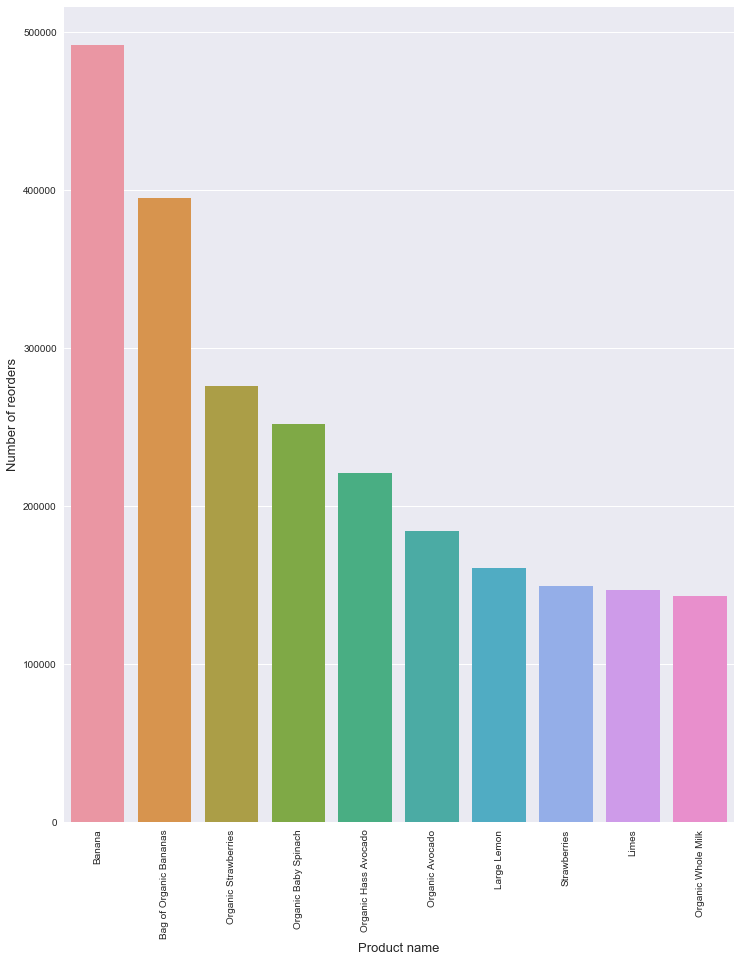

In [96]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(12, 15))
plt.xticks(rotation='vertical')
sns.barplot(product_grouped.index, product_grouped.values)
plt.ylabel('Number of reorders', fontsize=13)
plt.xlabel('Product name', fontsize=13)
plt.show()

It is evident from the graph above that organic products such as bananas and strawberries were ordered most. 

In [108]:
items  = pd.merge(left =pd.merge(left=products_df, right=departments_df, how='left'), right=aisles_df, how='left')
items.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,2,All-Seasons Salt,104,13,pantry,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,frozen meals
4,5,Green Chile Anytime Sauce,5,13,pantry,marinades meat preparation


In [118]:
users_orders = orders_df[['user_id', 'order_id']].merge(order_products_training_df[['order_id', 'product_id']],
                                          how='inner', left_on='order_id', right_on='order_id')

users_orders = users_orders.merge(items, how='inner', left_on='product_id',
                                         right_on='product_id')
users_orders.head(10)

,user_id,order_id,product_id,product_name,aisle_id,department_id,department,aisle
0,1,1187899,196,Soda,77,7,beverages,soft drinks
1,67,2757217,196,Soda,77,7,beverages,soft drinks
2,676,632715,196,Soda,77,7,beverages,soft drinks
3,760,1167274,196,Soda,77,7,beverages,soft drinks
4,804,3347074,196,Soda,77,7,beverages,soft drinks
5,865,692135,196,Soda,77,7,beverages,soft drinks
6,992,3289231,196,Soda,77,7,beverages,soft drinks
7,1306,1269882,196,Soda,77,7,beverages,soft drinks
8,1512,1558696,196,Soda,77,7,beverages,soft drinks
9,1550,2005577,196,Soda,77,7,beverages,soft drinks


In [119]:
grouped = users_orders.groupby("department")["order_id"].aggregate({'Total_orders': 'count'}).reset_index()
grouped.sort_values(by='Total_orders', ascending=False, inplace=True)
grouped

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,department,Total_orders
19,produce,409087
7,dairy eggs,217051
20,snacks,118862
3,beverages,114046
10,frozen,100426
16,pantry,81242
2,bakery,48394
6,canned goods,46799
8,deli,44291
9,dry goods pasta,38713


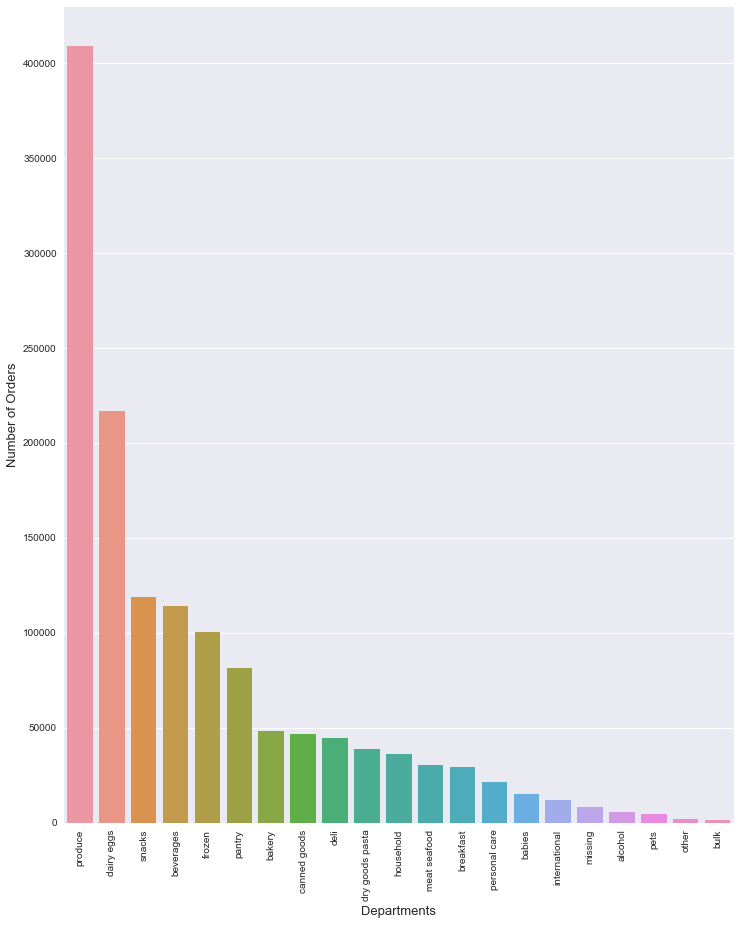

In [120]:
grouped  = grouped.groupby(['department']).sum()['Total_orders'].sort_values(ascending=False)

f, ax = plt.subplots(figsize=(12, 15))
plt.xticks(rotation='vertical')
sns.barplot(grouped.index, grouped.values)
plt.ylabel('Number of Orders', fontsize=13)
plt.xlabel('Departments', fontsize=13)
plt.show()

As you can see in the diagram above, the most popular department is that of the produce department. 

In [122]:
grouped = users_orders.groupby("aisle")["order_id"].aggregate({'Total_orders': 'count'}).reset_index()
grouped.sort_values(by='Total_orders', ascending=False, inplace=True )
grouped.head(10)

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,aisle,Total_orders
53,fresh vegetables,150609
50,fresh fruits,150473
98,packaged vegetables fruits,78493
133,yogurt,55240
93,packaged cheese,41699
131,water seltzer sparkling water,36617
83,milk,32644
25,chips pretzels,31269
119,soy lactosefree,26240
11,bread,23635


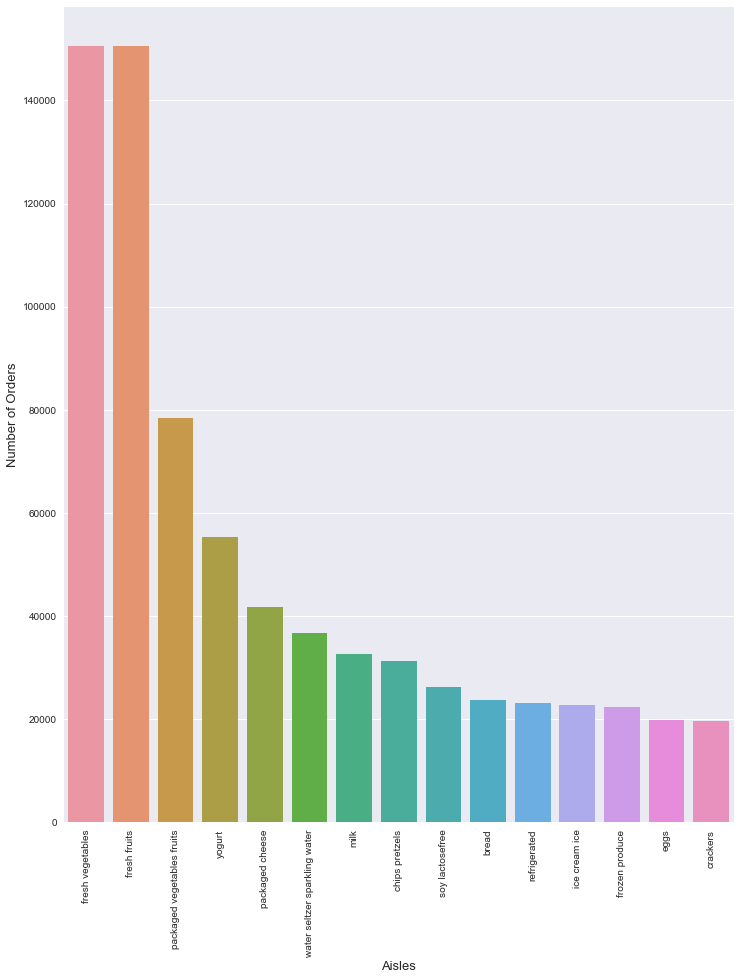

In [123]:
grouped  = grouped.groupby(['aisle']).sum()['Total_orders'].sort_values(ascending=False)[:15]

f, ax = plt.subplots(figsize=(12, 15))
plt.xticks(rotation='vertical')
sns.barplot(grouped.index, grouped.values)
plt.ylabel('Number of Orders', fontsize=13)
plt.xlabel('Aisles', fontsize=13)
plt.show()

Fresh fruits and fresh vegetables are the most popular aisles, and customers buy most products from these aisles.

Through this exploration, we have delved deep into various factors that might affect which product would a user buy next on Instacart.com. 